# 1. Score current methods

In [7]:
import ast
import pandas as pd
from collections import defaultdict

from common import score_models, draw_bar_plot, clean_string

In [8]:
reading_lists = pd.read_csv("../reading_lists.csv")
reading_lists['reading_list'] = reading_lists['reading_list'].apply(ast.literal_eval)

trues = { id_:[ref["paperId"] for ref in references] for id_, references in zip(reading_lists["id"], reading_lists["reading_list"]) }

In [17]:
models_paths = {
    "Semantic Scholar": "current_methods/search_engines/preds/semantic_scholar",
    "Google Scholar": "current_methods/search_engines/preds/google_scholar",
    "GPT-4o-2024-05-13": "current_methods/instructs_models/preds/gpt-4o-2024-05-13",
    "GPT-4o-2024-05-13 (JM)": "current_methods/instructs_models/preds/gpt-4o-2024-05-13_json",
    "GPT-4o-2024-08-06": "current_methods/instructs_models/preds/gpt-4o-2024-08-06",
    "GPT-4o-2024-08-06 (JM)": "current_methods/instructs_models/preds/gpt-4o-2024-08-06_json",
    "GPT-4o-2024-08-06 (SO)": "current_methods/instructs_models/preds/gpt-4o-2024-08-06_structured_output",
    "Gemini 1.5 flash": "current_methods/instructs_models/preds/gemini-1.5-flash",
    "Gemini 1.5 flash (JM)": "current_methods/instructs_models/preds/gemini-1.5-flash_json",
    "Gemini 1.5 pro (JM)": "current_methods/instructs_models/preds/gemini-1.5-pro_json"
}

## Default comparison

### Comparison with id aligned with Semantic Scholar

In [18]:
table = score_models(trues, models_paths.keys(), models_paths.values(), split_by_years=False, use_title_instead_of_id=False); table 
#print(table.to_latex(float_format="{:0.1f}".format))

recall                                        ndcg  \
                               A1         A2         A3       Mean         A1   
Semantic Scholar         5.265640   3.861921   6.583320   5.236960   3.754330   
Google Scholar           8.392037   5.166921   8.807527   7.455495   7.238782   
GPT-4o-2024-05-13        9.794605   9.777046  11.378915  10.316855   9.153843   
GPT-4o-2024-05-13 (JM)   7.531431   7.570902   7.861514   7.654616   8.127693   
GPT-4o-2024-08-06       11.052678  10.283630  11.605377  10.980562  11.085395   
GPT-4o-2024-08-06 (JM)   6.940904   6.441813   6.839105   6.740608   8.360255   
GPT-4o-2024-08-06 (SO)   6.812562   6.316339   6.581360   6.570087   8.678278   
Gemini 1.5 flash         2.309704   3.552532   4.237099   3.366445   2.191814   
Gemini 1.5 flash (JM)    6.452551   5.026271   6.173469   5.884097   9.033245   
Gemini 1.5 pro (JM)      7.904815   7.565020   9.048293   8.172709   7.196337   

                                                               mrr             \
                               A2         A3       Mean         A1         A2   
Semantic Scholar         3.118364   4.834780   3.902491   6.986799   5.792888   
Google Scholar           4.704589   7.124125   6.355832  13.024786   9.731530   
GPT-4o-2024-05-13       11.325027  12.198224  10.892365  16.556184  23.303607   
GPT-4o-2024-05-13 (JM)   7.446731   8.356305   7.976910  16.588235  15.537028   
GPT-4o-2024-08-06        9.836757  11.888099  10.936750  20.337111  17.701341   
GPT-4o-2024-08-06 (JM)   6.812539   8.204081   7.792291  16.365008  15.042993   
GPT-4o-2024-08-06 (SO)   6.709392   8.390550   7.926073  17.954758  14.558633   
Gemini 1.5 flash         3.537345   3.343881   3.024347   4.358577   8.189484   
Gemini 1.5 flash (JM)    6.717336   8.530102   8.093561  13.302288  12.110106   
Gemini 1.5 pro (JM)      5.901731   7.697542   6.931870  14.481649  11.322256   

                                              
                               A3       Mean  
Semantic Scholar         9.115406   7.298364  
Google Scholar          12.653423  11.803246  
GPT-4o-2024-05-13       25.442344  21.767378  
GPT-4o-2024-05-13 (JM)  17.791011  16.638758  
GPT-4o-2024-08-06       23.560691  20.533048  
GPT-4o-2024-08-06 (JM)  18.738562  16.715521  
GPT-4o-2024-08-06 (SO)  17.219349  16.577580  
Gemini 1.5 flash         5.451153   5.999738  
Gemini 1.5 flash (JM)   11.447221  12.286538  
Gemini 1.5 pro (JM)     16.524973  14.109626

### Comparison using titles of predicted articles

In [19]:
trues_titles = { id_:[clean_string(ref["title"]) for ref in references if ref["acl_id"]] for id_, references in zip(reading_lists["id"], reading_lists["reading_list"]) }
table = score_models(trues_titles, models_paths.keys(), models_paths.values(), split_by_years=False, use_title_instead_of_id=True); table 
#print(table.to_latex(float_format="{:0.1f}".format))

recall                                     ndcg  \
                              A1        A2         A3      Mean        A1   
Semantic Scholar        4.249837  4.227006   6.673190  5.050011  2.130474   
Google Scholar          7.155903  3.957382   7.378284  6.163856  4.657526   
GPT-4o-2024-05-13       8.030007  8.829093   9.742335  8.867145  5.588831   
GPT-4o-2024-05-13 (JM)  4.703196  4.977169   7.031963  5.570776  3.581937   
GPT-4o-2024-08-06       7.025440  8.910633  10.303327  8.746467  5.461467   
GPT-4o-2024-08-06 (JM)  5.251142  5.182648   6.369863  5.601218  4.113560   
GPT-4o-2024-08-06 (SO)  5.662100  5.091324   6.963470  5.905632  4.425795   
Gemini 1.5 flash        0.902778  1.898148   1.782407  1.527778  0.558626   
Gemini 1.5 flash (JM)   3.812785  4.315068   3.055556  3.727803  2.888572   
Gemini 1.5 pro (JM)     6.187215  9.155251  10.786749  8.709738  4.163876   

                                                           mrr            \
                              A2        A3      Mean        A1        A2   
Semantic Scholar        2.677806  3.930081  2.912787  2.463178  3.782072   
Google Scholar          2.737532  5.055213  4.150090  6.806915  3.997030   
GPT-4o-2024-05-13       6.265161  6.709617  6.187870  7.188519  8.560606   
GPT-4o-2024-05-13 (JM)  3.495702  5.312949  4.130196  3.972603  3.972603   
GPT-4o-2024-08-06       6.252379  7.393581  6.369142  8.009194  6.801083   
GPT-4o-2024-08-06 (JM)  3.672984  5.045427  4.277324  4.851598  4.408023   
GPT-4o-2024-08-06 (SO)  3.559889  5.553331  4.513005  5.106545  3.750815   
Gemini 1.5 flash        1.040709  0.768987  0.789441  0.902406  1.359954   
Gemini 1.5 flash (JM)   4.080251  1.784971  2.917932  3.890791  3.024487   
Gemini 1.5 pro (JM)     5.671127  6.659613  5.498205  6.475237  6.921791   

                                            
                              A3      Mean  
Semantic Scholar        5.617313  3.954188  
Google Scholar          7.846271  6.216739  
GPT-4o-2024-05-13       8.705153  8.151426  
GPT-4o-2024-05-13 (JM)  6.702272  4.882493  
GPT-4o-2024-08-06       8.465012  7.758430  
GPT-4o-2024-08-06 (JM)  7.411310  5.556977  
GPT-4o-2024-08-06 (SO)  6.930855  5.262738  
Gemini 1.5 flash        0.617284  0.959881  
Gemini 1.5 flash (JM)   1.805556  2.906945  
Gemini 1.5 pro (JM)     7.953884  7.116971

## Recall evolution by years

In [22]:
table_years = score_models(trues, models_paths.keys(), models_paths.values(), split_by_years=True) 

In [25]:
def format_to_df(table_years:pd.DataFrame, metric:str, keys:list, years:str = [2020, 2021, 2022, 2023, 2024]):
    data = defaultdict(list)
    for i, key in enumerate(keys):
        data["year"] = years
        for year in years:
            value = table_years.loc[(key, str(year))][(metric, "Mean")]/100
            data[key].append(value)
    return pd.DataFrame(data)

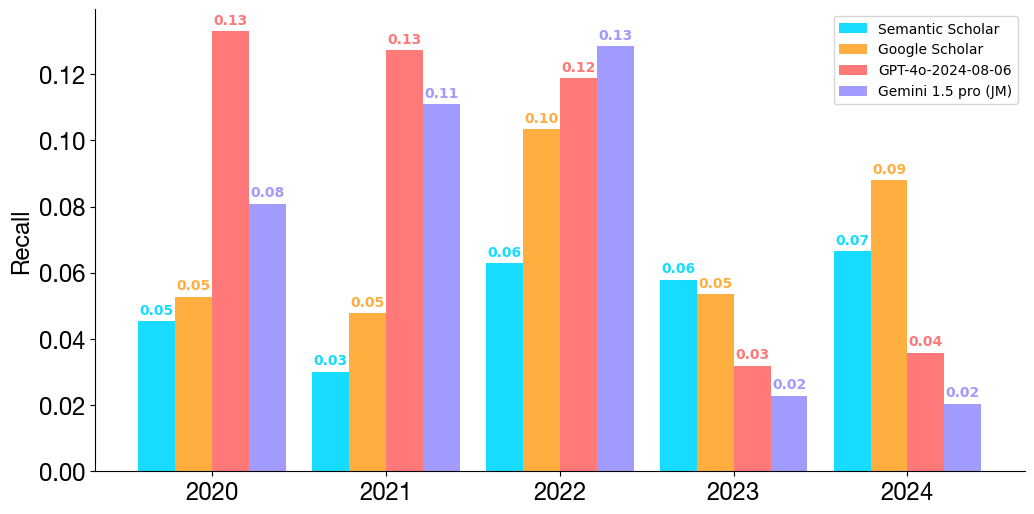

In [26]:
df = format_to_df(table_years, "recall", ["Semantic Scholar", "Google Scholar", "GPT-4o-2024-08-06", "Gemini 1.5 pro (JM)"])
draw_bar_plot(df, ylabel="Recall")

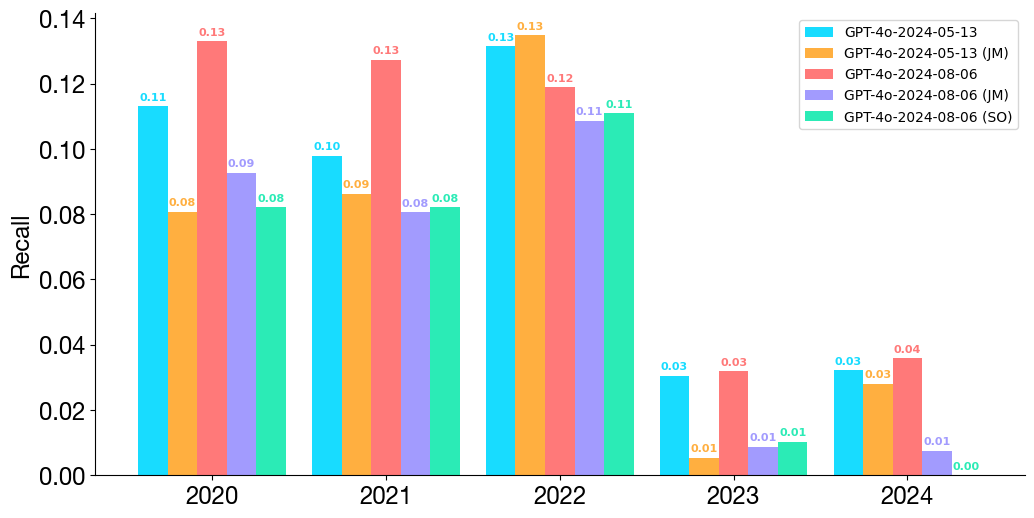

In [27]:
df = format_to_df(table_years, "recall", ["GPT-4o-2024-05-13", "GPT-4o-2024-05-13 (JM)", "GPT-4o-2024-08-06", "GPT-4o-2024-08-06 (JM)", "GPT-4o-2024-08-06 (SO)"])
draw_bar_plot(df, ylabel="Recall")

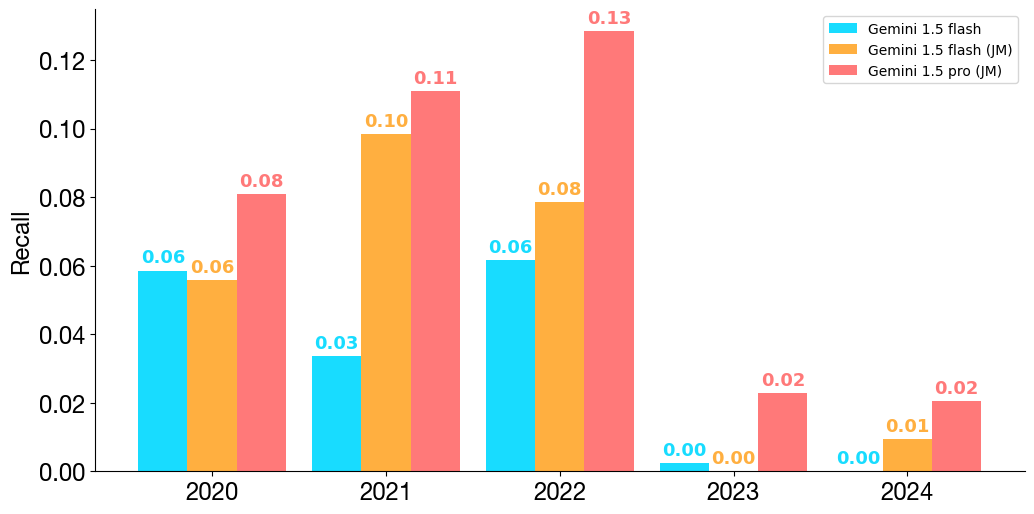

In [29]:
df = format_to_df(table_years, "recall", ["Gemini 1.5 flash", "Gemini 1.5 flash (JM)", "Gemini 1.5 pro (JM)"])
draw_bar_plot(df, ylabel="Recall")